In [1]:
import json
import os
import numpy as np

TOPK = 5

data = {}

# Loop through all json files in the current directory
for filename in os.listdir('.'):
    if filename.endswith('.json'):
        with open(filename, 'r') as f:
            study = json.load(f)
            accuracies = []
            for entry in study:
               accuracies.append(np.max(entry["results"]))
            data[filename] = np.sort(accuracies)[-TOPK:]

In [2]:
import pandas as pd
import re

df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# "Melt" the DataFrame to make it long format
df = df.melt(var_name='study', value_name='accuracy')

df["T"] = df["study"].apply(lambda x: int(re.search("T=(\\d*)", x).group(1)))
df["I"] = df["study"].apply(lambda x: re.search("_(.*)\\[", x).group(1))

df = df.sort_values(by=["I", "T"])

(0.8, 0.9)

<Figure size 640x480 with 0 Axes>

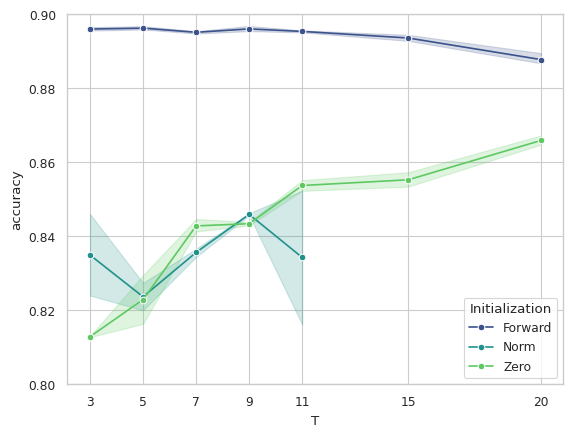

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from tueplots import bundles

NEURIPS_FORMAT_FULL = bundles.neurips2024(rel_width=1.0)
plt.clf()
# Create the main figure
sns.set_theme("paper", style="whitegrid")
# plt.rcParams.update(NEURIPS_FORMAT_FULL)
fig = plt.figure()

sns.set_theme("paper", "whitegrid")
ax = sns.lineplot(
    x='T',
    y='accuracy',
    hue="I",
    marker="o",
    palette=sns.color_palette("viridis", n_colors=3),
    data=df)
ax.legend(title="Initialization", loc="lower right", handles=ax.get_legend().legend_handles, labels=["Forward", "Normal", "Zero", ])
ax.set_xticks(df["T"].unique())
ax.set_ylim(0.8, 0.9)
